In [3]:
import numpy as np
a = np.array([[0, 0, 0, 0, 0], 
              [0, 1, 1, 0, 0.5], 
              [1, 0, 1, 0, 0.5]])

b = np.array([[0, 0, 0, 0, 0], 
              [0, 2, 2, 0, 0.5], 
              [2, 0, 2, 0, 0.5]])

c = np.array([[1, 0, 1, 0, 0.5], 
              [0, 0, 0, 0, 0], 
              [0, 1, 1, 0, 0.5]])

In [4]:
import matplotlib.pyplot as plt


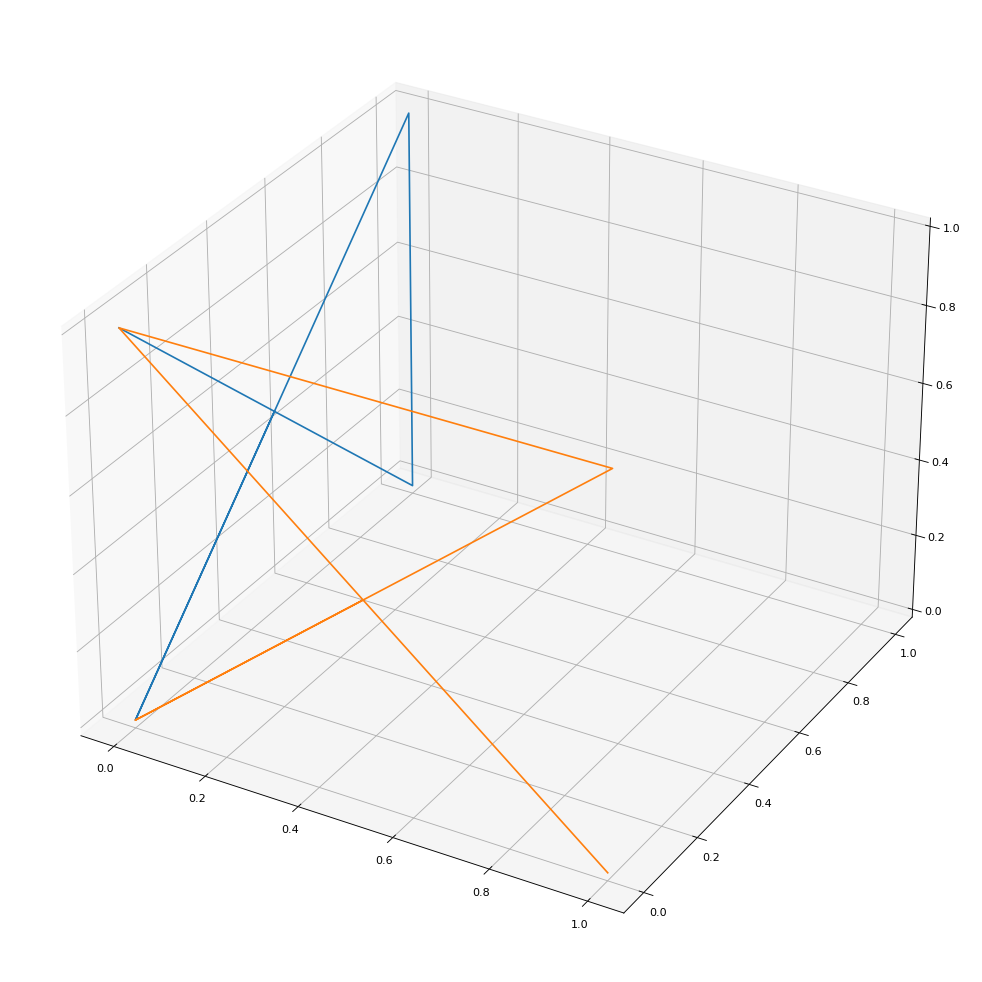

In [5]:

fig = plt.figure(figsize=(18, 16), dpi= 80,)
ax = fig.add_subplot(111, projection='3d')
ax.plot(*a)
# ax.plot(*b)
ax.plot(*c)

In [6]:
transform = np.array([[0, 0, 1],
                     [0, 0, 0],
                     [0, 1, 0]]).T
print(a)
print(np.matmul(transform, c))

[[0.  0.  0.  0.  0. ]
 [0.  1.  1.  0.  0.5]
 [1.  0.  1.  0.  0.5]]
[[0.  0.  0.  0.  0. ]
 [0.  1.  1.  0.  0.5]
 [1.  0.  1.  0.  0.5]]


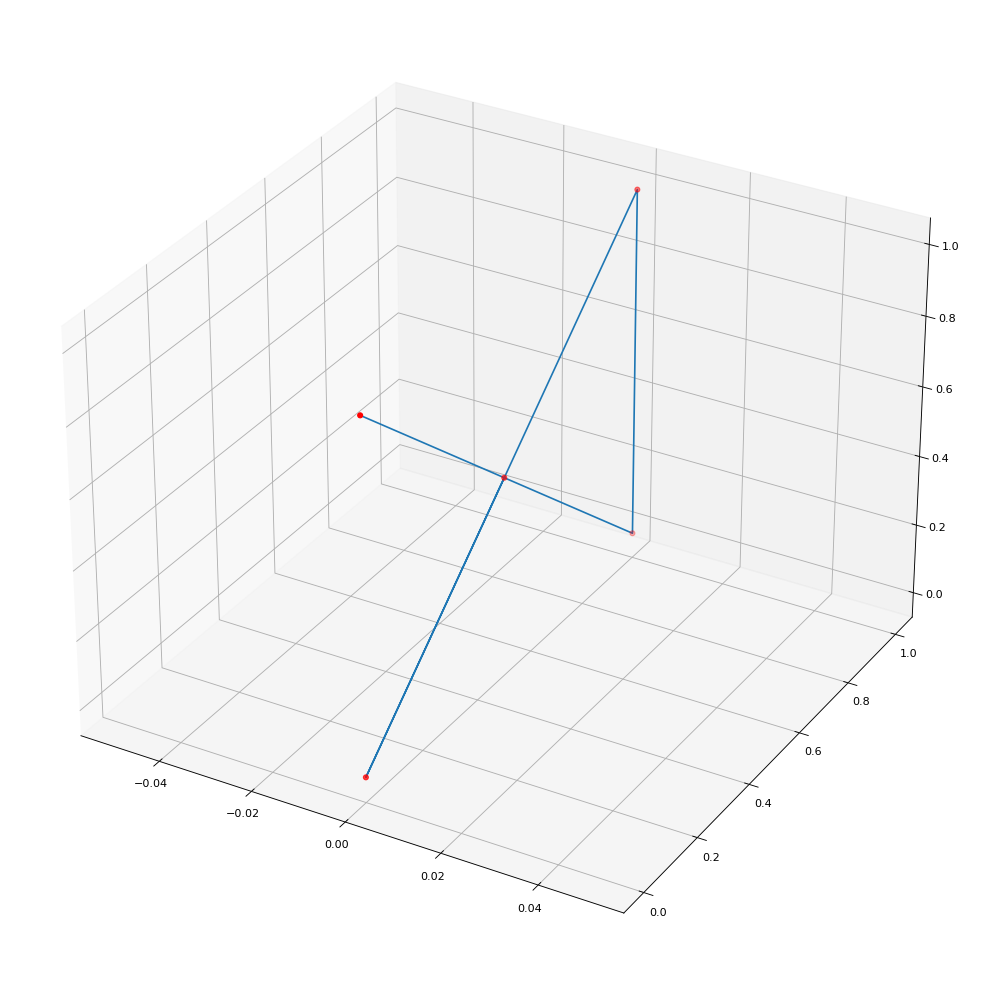

In [7]:
fig = plt.figure(figsize=(18, 16), dpi= 80,)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*a, color="r")
# ax.plot(*b)
ax.plot(*np.matmul(transform, c))

In [10]:
first = np.array([[1, 0, 0],
                  [0, 0, 0],
                  [0, 1, 0]])
zeros = np.array([[1,0,0],
                 [0,0,0],
                 [0,1,0]])
np.matmul(zeros, first)

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [23]:
a = np.array([[0, 0, 0, 0, 0], 
              [0, 1, 1, 0, 0.5], 
              [1, 0, 1, 0, 0.5]])
a_svd = np.linalg.svd(a)
c_svd = np.linalg.svd(c)
b_svd = np.linalg.svd(b)
d = a*2
d_svd = np.linalg.svd(d)
for i in range(len(a_svd)):
    print("first diff")
    print(a_svd[i])
    print("**"*10)
    print(c_svd[i])
    print("**"*10)
    print(b_svd[i])
    print("**"*10)
    print(d_svd[i])
    
    if c_svd[i].all() == a_svd[i].all():
        print("true")

first diff
[[ 0.          0.         -1.        ]
 [-0.70710678  0.70710678  0.        ]
 [-0.70710678 -0.70710678  0.        ]]
********************
[[-0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [-0.70710678  0.70710678  0.        ]]
********************
[[ 0.          0.         -1.        ]
 [-0.70710678  0.70710678  0.        ]
 [-0.70710678 -0.70710678  0.        ]]
********************
[[ 0.          0.         -1.        ]
 [-0.70710678  0.70710678  0.        ]
 [-0.70710678 -0.70710678  0.        ]]
true
first diff
[ 1.87082869  1.         -0.        ]
********************
[1.87082869 1.         0.        ]
********************
[ 3.53553391  2.         -0.        ]
********************
[ 3.74165739  2.         -0.        ]
true
first diff
[[-3.77964473e-01 -3.77964473e-01 -7.55928946e-01  0.00000000e+00
  -3.77964473e-01]
 [-7.07106781e-01  7.07106781e-01  1.17514767e-16  0.00000000e+00
   5.87573836e-17]
 [-5.97614305e-01 -5.97614305e-01  4.780

In [29]:
np.linalg.eig(np.dot(a, a.T).T)

(array([3.5, 1. , 0. ]),
 array([[ 0.        ,  0.        ,  1.        ],
        [ 0.70710678,  0.70710678,  0.        ],
        [ 0.70710678, -0.70710678,  0.        ]]))

In [44]:
np.linalg.eig(np.dot(d, d.T))

(array([14.,  4.,  0.]),
 array([[ 0.        ,  0.        ,  1.        ],
        [ 0.70710678,  0.70710678,  0.        ],
        [ 0.70710678, -0.70710678,  0.        ]]))

In [97]:
transform_matrix = [
    np.array([[0,0,2],
             [0,2,0],
             [2, 0,0]]),
    np.array([[1, 1, 0],
             [2, 0, 0],
             [0, -1, 1]]),
    np.array([[-2, 0, 0],
             [0, -2, 0],
             [0, 0, -1]])
]
eig_val, eig_vec = np.linalg.eig(np.dot(a, a.T))
print(eig_vec)
for i in transform_matrix:
    tmp = np.matmul(i, a)
    tmp_eig_val, tmp_eig_vec = np.linalg.eig(np.dot(tmp, tmp.T))
    print("***"*10)
    print(tmp_eig_vec)
    

[[ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]]
******************************
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
******************************
[[ 0.74967818  0.66180256  0.        ]
 [ 0.          0.          1.        ]
 [-0.66180256  0.74967818  0.        ]]
******************************
[[ 0.          0.          1.        ]
 [ 0.31340294 -0.94962024  0.        ]
 [-0.94962024 -0.31340294  0.        ]]


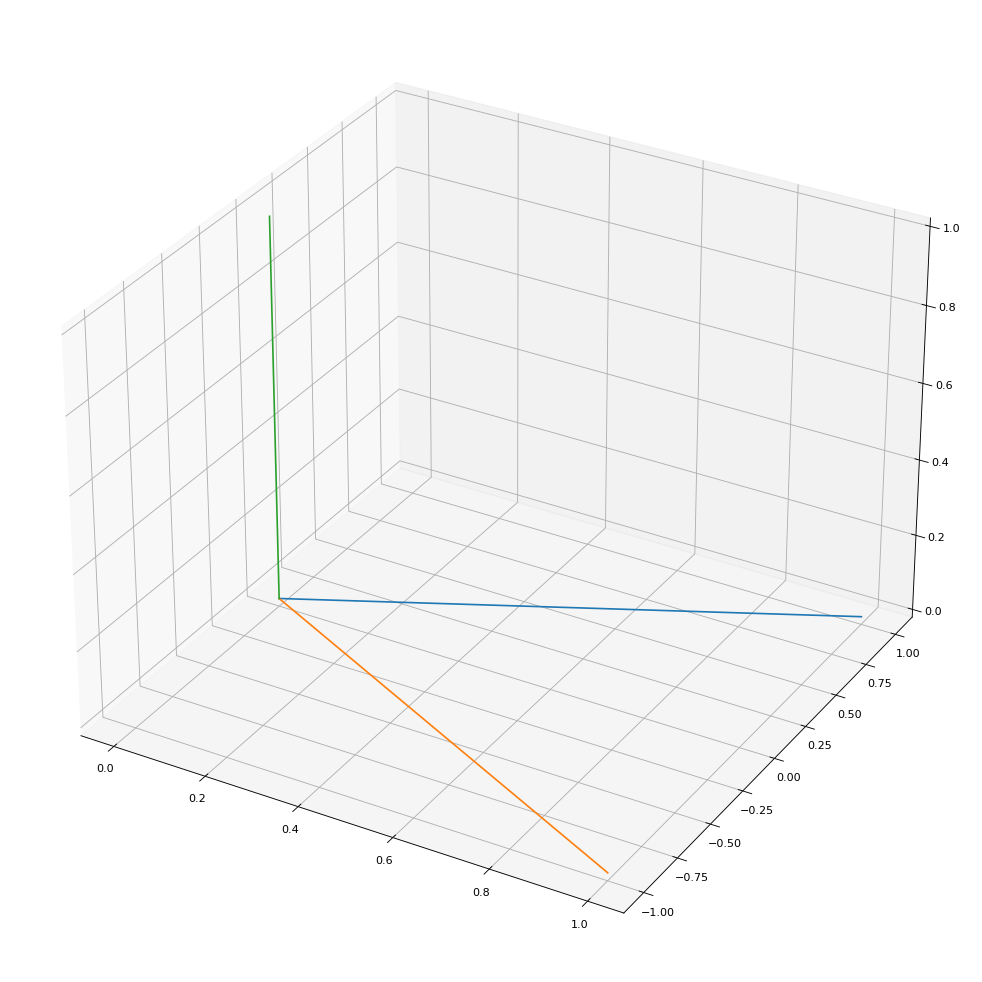

In [77]:
fig = plt.figure(figsize=(18, 16), dpi= 80,)
tmp = np.array([[1, 1, 0],
             [1, -1, 0],
             [0, 0, 1]])
ax = fig.add_subplot(111, projection='3d')

for i in tmp:
    ax.plot([0, i[0]], [0, i[1]], [0, i[2]])

In [98]:
np.linalg.pinv(a)

array([[ 0.        , -0.35714286,  0.64285714],
       [ 0.        ,  0.64285714, -0.35714286],
       [ 0.        ,  0.28571429,  0.28571429],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.14285714,  0.14285714]])